# Feature based price prediction of Used Cars

## Data setup and import

In [1]:
import pandas as pd

In [2]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',names = headers)

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

# Data wrangling

In [6]:
import matplotlib.pylab as plt
import numpy as np

### Missing value imputation

In [7]:
df.replace("?",np.nan,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
# Check to see which all columns have null values
data = df.isnull()
for column in data.columns.values.tolist():
    print(column)
    print(data[column].value_counts())
    print('')

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

####  Replace missing values by mean and convert the column values to their respective types

In [9]:
nor_mean = df['normalized-losses'].astype(float).mean(axis = 0)
df['normalized-losses'].replace(np.nan,nor_mean,inplace = True)

In [10]:
df['bore'].replace(np.nan,df['bore'].astype(float).mean(axis = 0),inplace = True)

In [11]:
df['stroke'].replace(np.nan,df['stroke'].astype(float).mean(axis = 0),inplace = True)

In [12]:
df['horsepower'].replace(np.nan,df['horsepower'].astype(float).mean(axis = 0),inplace = True)

In [13]:
df['peak-rpm'].replace(np.nan,df['peak-rpm'].astype(float).mean(axis = 0),inplace = True)

In [14]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [15]:
df['num-of-doors'].replace(np.nan,df['num-of-doors'].value_counts().idxmax(),inplace = True)

In [16]:
df.dropna(inplace=True)
df['price'].isnull().value_counts()

False    201
Name: price, dtype: int64

In [17]:
df[['peak-rpm','bore','stroke']] = df[['peak-rpm','bore','stroke']].astype(float)

In [18]:
df['normalized-losses'] = df['normalized-losses'].astype(int)

In [19]:
df['price'] = df['price'].astype(float)

In [20]:
df[['peak-rpm','bore','stroke','normalized-losses','price']].dtypes

peak-rpm             float64
bore                 float64
stroke               float64
normalized-losses      int32
price                float64
dtype: object

### Standardization

In [21]:
df['city-l/100km'] = 235/df['city-mpg']

In [22]:
df['highway-l/100km'] = 235/df['highway-mpg']

### Normalization

In [23]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df[['length','width']].head()

,length,width
0,0.811148,0.890278
1,0.811148,0.890278
2,0.822681,0.909722
3,0.848630,0.919444
4,0.848630,0.922222


In [24]:
df['horsepower'] = df['horsepower'].astype(int)

### Binning

In [25]:
bin_val = np.linspace(df['price'].min(),df['price'].max(),4)
grp = ['low','mid','high']
df['binned_values'] = pd.cut(df['price'],bin_val,labels = grp,include_lowest=True)
df['binned_values'].value_counts()

low     171
mid      18
high     12
Name: binned_values, dtype: int64

Text(0.5, 1.0, 'price bins')

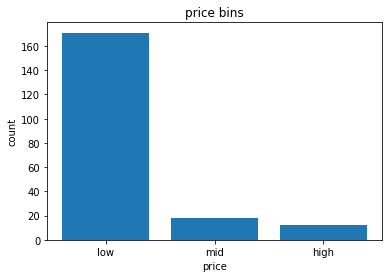

In [26]:
%matplotlib inline
plt.bar(grp, df["binned_values"].value_counts())

# set x/y labels and plot title
plt.xlabel("price")
plt.ylabel("count")
plt.title("price bins")

Most of the cars are low priced and very few have high price

### Dummies method

#### Regression analysis cannot take words as input so they have to be converted into dummy values to use them as input

In [27]:
dummy1 = pd.get_dummies(df['fuel-type'])
dummy1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [28]:
df = pd.concat([df,dummy1],axis=1)
df.drop("fuel-type", axis = 1, inplace=True)

In [29]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100km,highway-l/100km,binned_values,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,low,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,low,0,1


# Exploratory Data analysis

In [30]:
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [31]:
# correlation of different columns with price column
cor_val = df.corr()
cor_val[(cor_val.loc['price']>0.5) | (cor_val.loc['price']< -0.5)]['price']

wheel-base         0.584642
length             0.690628
width              0.751265
curb-weight        0.834415
engine-size        0.872335
bore               0.543155
horsepower         0.809607
city-mpg          -0.686571
highway-mpg       -0.704692
price              1.000000
city-l/100km       0.789898
highway-l/100km    0.801118
Name: price, dtype: float64

Continuous variables which are either in positive linear relationship or negative linear relation ship with price variable

In [32]:
df_test = df[['drive-wheels','body-style','price']]

In [33]:
data = pd.DataFrame(df_test.groupby(['drive-wheels','body-style'])['price'].mean())
data

price
drive-wheels body-style               
4wd          hatchback     7603.000000
             sedan        12647.333333
             wagon         9095.750000
fwd          convertible  11595.000000
             hardtop       8249.000000
             hatchback     8396.387755
             sedan         9811.800000
             wagon         9997.333333
rwd          convertible  23949.600000
             hardtop      24202.714286
             hatchback    14337.777778
             sedan        21711.833333
             wagon        16994.222222

In [34]:
# Average car price for different categories of drive-wheels and body-style
matrix = data.pivot_table(index='drive-wheels',columns='body-style',values='price')

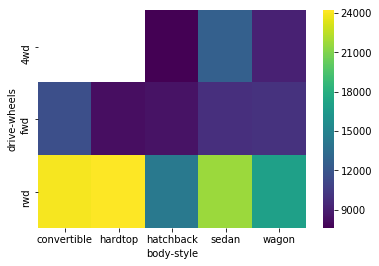

In [35]:
sb.heatmap(matrix,cmap='viridis')

It is clear that the car with rear wheel drive system and convertible, hardtop type of body-style costs more

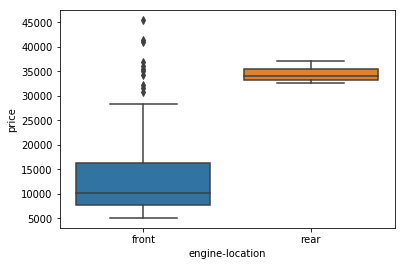

In [36]:
# categorical variables
sb.boxplot(x="engine-location", y="price", data=df)

Distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

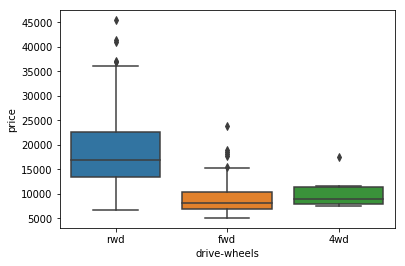

In [37]:
# drive-wheels vs price
sb.boxplot(x="drive-wheels", y="price", data=df)

Price distribution differs for each drive wheels with a very less variation

## Anova : To determine the correlation between the groups of a categorical variable

In [38]:
df_anova = df[['make','price']]
grp_anova = df_anova.groupby('make')

In [39]:
from scipy import stats
f_val,p_val = stats.f_oneway(grp_anova.get_group('honda')['price'],grp_anova.get_group('subaru')['price'])
print('F score: ',f_val,'P value: ',p_val)

F score:  0.19744030127462606 P value:  0.6609478240622193


F score is very less as there is more variation within group means compared to between group means so both are not much correlated to each other

In [40]:
f_val,p_val = stats.f_oneway(grp_anova.get_group('honda')['price'],grp_anova.get_group('jaguar')['price'])
print('F score: ',f_val,'P value: ',p_val)

F score:  400.925870564337 P value:  1.0586193512077862e-11


As price for honda and jaguar are significantly significant, F score is also large and both make models are very much correlated.

In [41]:
grp_test = df[['drive-wheels','price']].groupby(['drive-wheels'])
grp_test.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
140,4wd,7603.0


In [42]:
f_val,p_val = stats.f_oneway(grp_test.get_group('4wd')['price'],grp_test.get_group('fwd')['price'],grp_test.get_group('rwd')['price'])
print('F score: ',f_val,'P value: ',p_val)

F score:  67.95406500780399 P value:  3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance.

## Correlation

(0, 56161.033250497254)

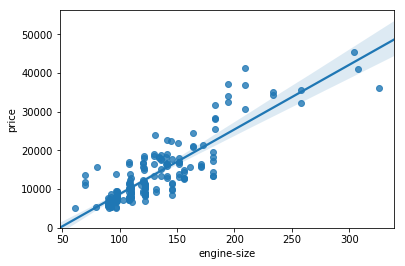

In [43]:
# Engine size as potential predictor variable of price
sb.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

This gives the indication of Positive linear relationship between Engine-size and price variale.

(0, 48302.486780509775)

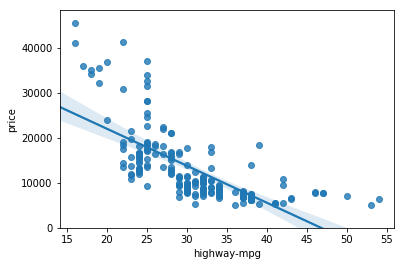

In [44]:
# regression plot for price vs highway-mpg
sb.regplot(x= 'highway-mpg',y = 'price',data = df)
plt.ylim(0,)  

Highway-mpg feature is negatively correlated with the price.

In [45]:
# highway column is negatively and linearly correlated with price 
df[['highway-mpg','price']].corr().iloc[0,1]

-0.7046922650589532

In [46]:
df[["engine-size", "price"]].corr().iloc[0,1]

0.8723351674455199

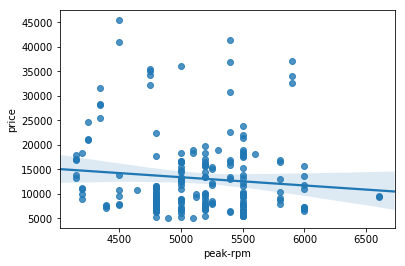

In [47]:
sb.regplot(x="peak-rpm", y="price", data=df)

peak rpm is not much correlated with the price

## Correlation using Pearson Co-efficient and P-value

It gives the stregth of the correlation between 2 variables

In [48]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571052  with a P-value of P =  6.273536270651004e-48


Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)</p>

In [49]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.20033551048166e-38


Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

In [50]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P =  2.1895772388936997e-53


<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>

In [51]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622197996e-64


<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

In [52]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935364e-17


Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

###  Important variables to take into account when predicting the car price

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

#  Model Development

In [53]:
df.head(2)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100km,highway-l/100km,binned_values,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,low,0,1


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
# linear regression model building
lin = LinearRegression()
lin

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Simple Linear Regression

In [56]:
x = df[['highway-mpg']]
y = df['price']

In [57]:
# Train model
lin.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
# Predict model
yhat = lin.predict(x)
yhat[0:3]

array([16236.50464347, 16236.50464347, 17058.23802179])

In [59]:
lin.intercept_  #b0

38423.3058581574

In [60]:
lin.coef_ #b1

array([-821.73337832])

##### Estimated linear model
<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg

### Multiple Linear Regression

In [61]:
X = df[['engine-size','highway-mpg','curb-weight','horsepower']]
lin.fit(X,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
lin.coef_ #b1 , b2, b3, b4

array([81.51280006, 36.1593925 ,  4.70805253, 53.53022809])

In [63]:
lin.intercept_ #b0

-15811.86376772922

<b>Price</b> = -15811.863767729214 + 53.53022809 x <b>horsepower</b> + 4.70805253 x <b>curb-weight</b> + 81.51280006 x <b>engine-size</b> + 36.1593925 x <b>highway-mpg</b>

In [64]:
y_hat = lin.predict(X)

Text(0, 0.5, 'Proportion of Cars')

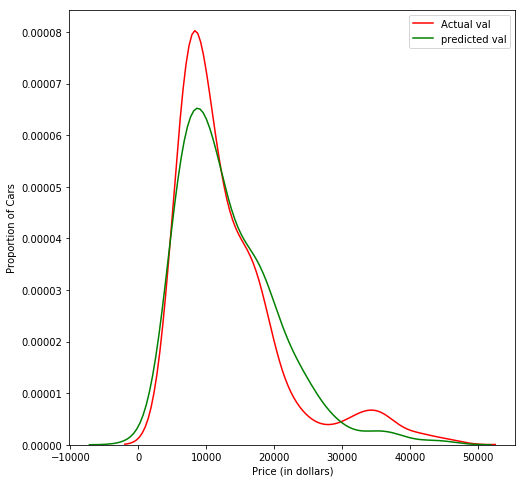

In [65]:
# plot of original vs predicted values
plt.figure(figsize=(8,8))
act = sb.distplot(df['price'],hist=False,color='r',label='Actual val')
sb.distplot(y_hat,hist=False,color='g',label='predicted val')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

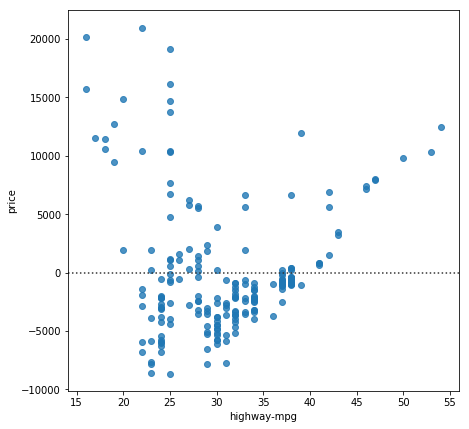

In [66]:
plt.figure(figsize=(7,7))
sb.residplot(df['highway-mpg'], df['price'])
plt.show()

residuals are not randomly spread around the x-axis and exhibits curvilinear nature, so a non-linear model is more appropriate for this data

### Polynomial fit

In [67]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [68]:
x = df['highway-mpg']
y = df['price']

In [69]:
# polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


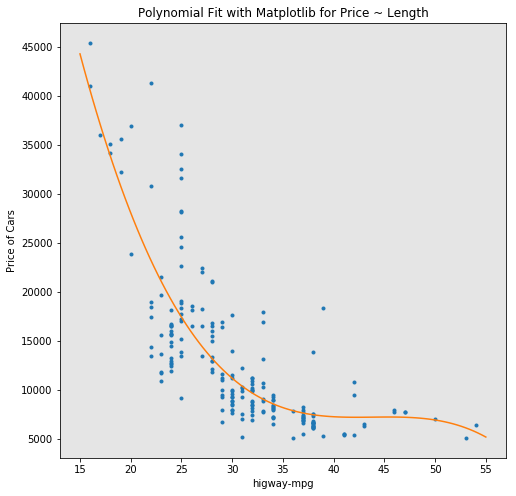

In [70]:
plt.figure(figsize=(8,8))
PlotPolly(p,x,y,'higway-mpg')

In [71]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

numpy's polyfit function can't perform more than 1D polynomial regression

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
polyfun = PolynomialFeatures(degree=2)

In [74]:
pol_in = polyfun.fit_transform(X)

In [75]:
pol_in.shape

(201, 15)

In [76]:
X.shape

(201, 4)

### Pipeline

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [78]:
# pipline reduces all the task of preprocessing, training and prediction
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures()),('linear',LinearRegression())]

In [79]:
pipe = Pipeline(Input)
pipe.fit(X,df['price'])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [80]:
y_pipe = pipe.predict(X)
y_pipe[0:5]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955,
       16135.53737535])

### Measures for insample evaluation : MSE and R2

In [81]:
x = df[['highway-mpg']]
y = df['price']
lin.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

##### SLR

In [82]:
# R^2 or Co-efficient of Determination
lin.score(x,y) #49.65% of variation of price is explained by this linear regression model

0.4965911884339176

In [83]:
y_hat = lin.predict(x)

In [84]:
from sklearn.metrics import mean_squared_error

In [85]:
mse = mean_squared_error(df['price'],y_hat)
mse

31635042.944639888

##### MLR

In [86]:
lin.fit(X,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
lin.score(X,df['price']) #80.93% of variation of price is explained by this multiple linear regression model

0.8093732522175299

In [88]:
y_mul = lin.predict(X)

In [89]:
mean_squared_error(y_mul,df['price'])

11979300.34981888

##### polynomial model

In [90]:
from sklearn.metrics import r2_score

In [91]:
r2_score(y,p(x)) # 67.41% of the variation is explained by this polynomial fit

0.674194666390652

In [92]:
mean_squared_error(df['price'], p(x))

20474146.426361214

MLR is better fit for the data because it produces lesser MSE value than SLR and Poly, also it produces Higher R^2 value  than other two models

# Model evaluation

In [93]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [94]:
df.head(2)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100km,highway-l/100km,binned_values,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,low,0,1


In [95]:
df = df._get_numeric_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 20 columns):
symboling            201 non-null int64
normalized-losses    201 non-null int32
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-size          201 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null int32
peak-rpm             201 non-null float64
city-mpg             201 non-null int64
highway-mpg          201 non-null int64
price                201 non-null float64
city-l/100km         201 non-null float64
highway-l/100km      201 non-null float64
diesel               201 non-null uint8
gas                  201 non-null uint8
dtypes: float64(11), int32(2), int64(5), uint8(2)
memory usage: 36.7 KB


In [96]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [97]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    plt.figure(figsize=(12,10))

    ax1 = sb.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sb.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [98]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    plt.figure(figsize=(12,10))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [99]:
Y = df['price']
X = df.drop('price',axis = 1)

## Train and Test data

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1)

In [102]:
x_test.shape

(21, 19)

In [103]:
x_train.shape

(180, 19)

In [104]:
y_test.shape

(21,)

In [105]:
y_train.shape

(180,)

In [106]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

In [107]:
lin.fit(x_train[['horsepower']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
lin.score(x_train[['horsepower']],y_train)

0.6541484705681064

In [109]:
lin.score(x_test[['horsepower']],y_test)

0.6618482281677851

### Cross validation score

In [110]:
from sklearn.model_selection import cross_val_score
r_val = cross_val_score(lin,X[['horsepower']],Y,cv=4)

In [111]:
r_val

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

In [112]:
r_val.mean()

0.5220592359225414

In [113]:
r_val.std()

0.2913048066611844

In [114]:
r_val = cross_val_score(lin,X[['horsepower']],Y,cv=4,scoring='neg_mean_squared_error')

In [115]:
-1*r_val

array([20251357.7835463 , 43743920.05390439, 12525158.34507633,
       17564549.69976653])

In [116]:
from sklearn.model_selection import cross_val_predict

In [117]:
yhat = cross_val_predict(lin,X[['horsepower']],Y,cv= 4)
yhat[0:4]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ])

## Overfitting, Underfitting

In [118]:
mlr = LinearRegression()

In [119]:
mlr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [120]:
yhat_train = mlr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]) #traing prediction
yhat_train[0:5]

array([ 7837.77729535, 12854.35005596, 11693.47824183, 16741.72326948,
       23181.92710516])

In [121]:
yhat_test = mlr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])# testing prediction
yhat_test[0:5]

array([18587.70199245, 11899.71426119,  7476.65597982,  6569.24366901,
       10852.6431338 ])

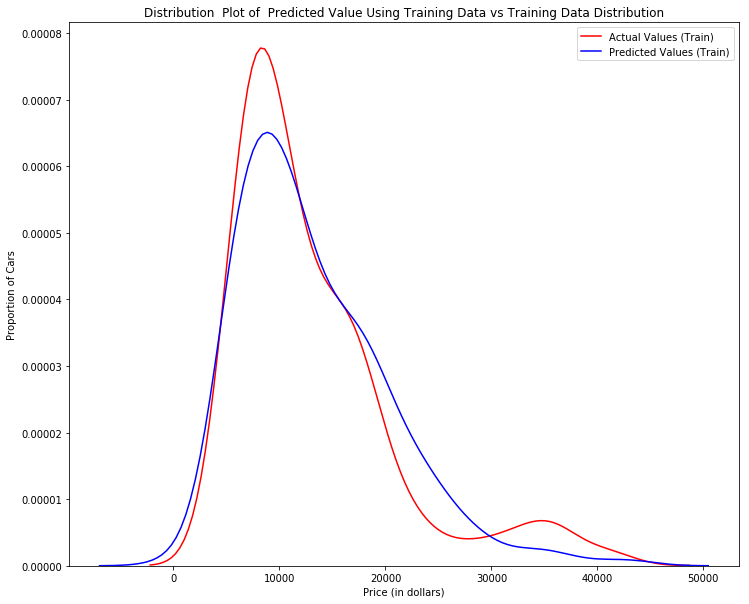

In [122]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

#### Model has performed well for train data as both curves match to each other

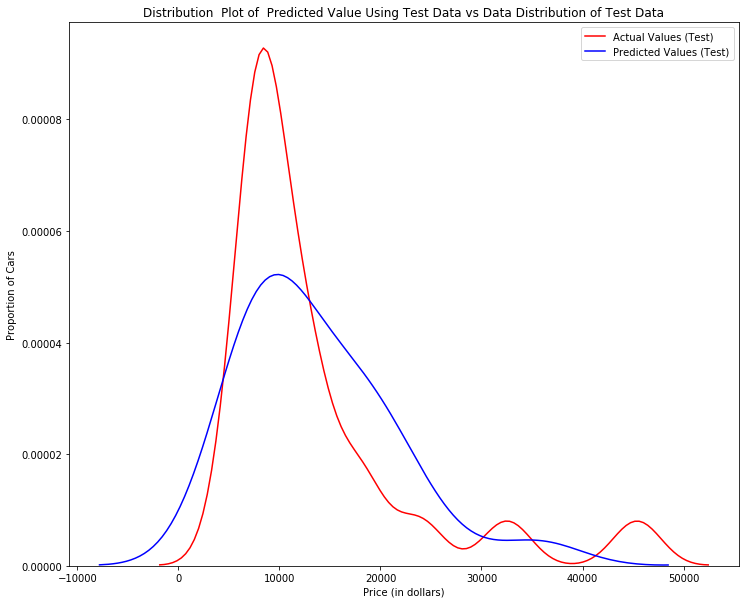

In [123]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [124]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.45,random_state = 0)
x_train.shape

(110, 19)

In [125]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])                         # Transform
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [126]:
poly = LinearRegression()                                             # train
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [127]:
y = poly.predict(x_test_pr)
y[0:4]

array([ 6727.63321769,  7306.75973534, 12213.74782564, 18894.93936537])

In [128]:
print("Predicted values:", y[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6727.63321769  7306.75973534 12213.74782564 18894.93936537]
True values: [ 6295. 10698. 13860. 13499.]


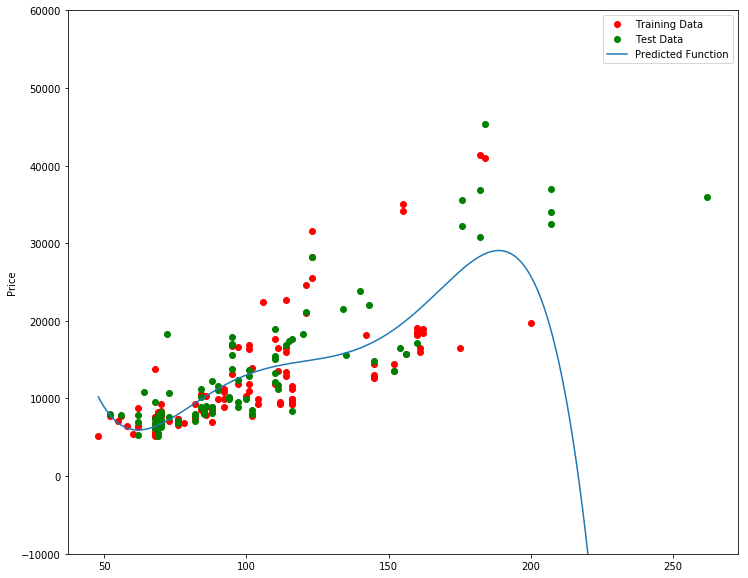

In [129]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [130]:
poly.score(x_train_pr, y_train)

0.5568527851358911

 R^2 of the test data:

In [131]:
poly.score(x_test_pr, y_test)

-29.815862048046874

R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

4

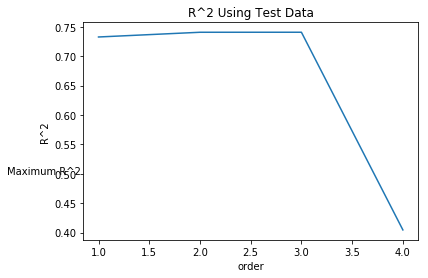

In [132]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lin.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lin.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(0.1, 0.5, 'Maximum R^2 ')    
len(Rsqu_test)

So polynomial function of degree 3 fits best to the data and estimates the sample function well 

In [133]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [134]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

## Ridge regression 

It prevents overfitting and solves the problem of approximating the estimated function to true function when multiple independent features are considered 

In [135]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [136]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [137]:
from sklearn.linear_model import Ridge

In [138]:
RidgeModel=Ridge(alpha=0.1)

In [139]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [140]:
yhat = RidgeModel.predict(x_test_pr)
yhat[0:3]

array([6369.09401511, 5052.43337909, 5990.27552196])

In [141]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6369.09401511  5052.43337909  5990.27552196 13406.96741014]
test set : [ 7499.  6479.  6488. 22018.]


In [142]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RidgeModel = Ridge(alpha=alfa) 
    RidgeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RidgeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RidgeModel.score(x_train_pr, y_train))

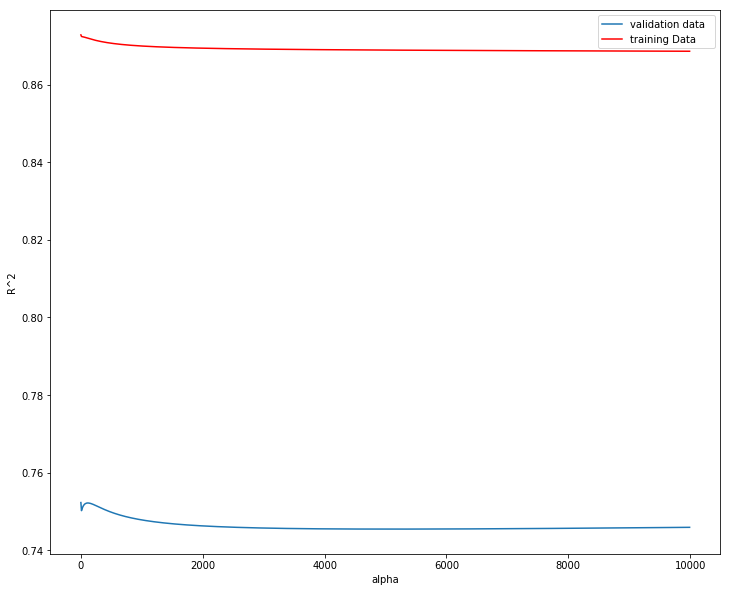

In [143]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The red line represents the  R^2 of the training data, as Alpha increases the R^2 decreases; therefore as Alfa increases the model performs worse on the train data.  The blue line represents the R^2 on the test data, as the value for Alfa increases the R^2 decreases.   

## Grid search

##### GridsearchCV helps in determining best parameters for the model

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

In [146]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [147]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [148]:
Grid1.fit(X[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],Y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [149]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [164]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [165]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8364094050245394

#### Conclusion: Nearly 84% of data variation is explained by this model of Ridge regression with Grid searchCV where the most import features are Horsepower, Curb-weight, Engine-size and Highway-mpg to predict the price of a car.